In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_data_dir = 'C:/Users/soyeon/Desktop/ETRI/Mnist/mnist_train.csv'
test_data_dir = 'C:/Users/soyeon/Desktop/ETRI/Mnist/mnist_test.csv'

#Load the training Data
train_data = open(train_data_dir, "r")
train = train_data.readlines()
train_data.close()
print('training data: ',len(train)) #the number of training data

#Load the test data
test_data = open(test_data_dir, "r")
test = test_data.readlines()
test_data.close()
print('test data: ',len(test)) #the number of test data


training data:  60001
test data:  10001


In [4]:

row = 28
col = 28


train_imgs = np.zeros((row*col, len(train)-1), dtype = float) #28*28, 데이터의 갯수
train_labels = np.zeros(len(train)-1, dtype=int)

def normalization(data):
    #normalize the data
    #output values are between 0 and 1
    return data/255 #pixel 0<value<255

for i, line in enumerate(train):
    if i==0:
        pass; #the first colum (각 열에 대한 정보)))
    else:
        data_line = line.split(',') 
        label = data_line[0] #첫번 째 열에 정답 존재 EX)0,5,9..
        data_vector = np.asfarray(data_line[1:]) # 정답 이후에 열들 분리
        data_vector = normalization(data_vector) # pixel normalization
        
        train_imgs[:,i-1] = data_vector # 2차원 배열에 저장. (784, 데이터갯수)
        train_labels[i-1] = label #2차원 배열에 저장 (데이터 갯수, 정답)

# 직접 Test Loading 구현해 보기

변수 명:
test_imgs, test_labels

In [5]:

test_imgs =  np.zeros((row*col, len(test)-1), dtype = float)
test_labels = np.zeros(len(test)-1, dtype=int)


for i, line in enumerate(test):
    if i==0:
        pass;
    else:
        data_line = line.split(',')
        label = data_line[0]
        data_vector = np.asfarray(data_line[1:])
        data_vector = normalization(data_vector)
        test_imgs[:,i-1] = data_vector
        test_labels[i-1] = label
        

In [6]:


print('train_imgs shape',train_imgs.shape) #(행,열) (784, 60000)
print('train labels shape',train_labels.shape) #(행,열) (60000)


print('test_imgs shape',test_imgs.shape) #정답: (784, 10000)
print('test labels shape',test_labels.shape) #정답: (10000,1)

train_imgs shape (784, 60000)
train labels shape (60000,)
test_imgs shape (784, 10000)
test labels shape (10000,)


In [7]:
def one_hot(label):
    target = []
    #label shape(60000,)
    #5, 4, 1 ,.. =>[0,0,0,0,1,0,0]
    criterion = np.arange(10) #[0,1,2,3,4,5,6,7,8,9]
    print(len(label)) #output: 60000, 10000
    for i in range(len(label)): 
        one_hot = (criterion==label[i]).astype(np.int) # [False,False,False, True, False,False, False] => [0,0,0,1,0,0,0]
        target.append(one_hot)
    return target

tr_labels_one_hot = one_hot(train_labels) 
tr_labels_one_hot = np.array(tr_labels_one_hot).T #transopose (행, 열) => (열, 행)
print('training labels after one hot encoding',np.array(tr_labels_one_hot).shape)


60000
training labels after one hot encoding (10, 60000)


In [8]:

tst_labels_one_hot = one_hot(test_labels)
tst_labels_one_hot = np.array(tst_labels_one_hot).T #transopose(행, 열) => (열, 행)
print('test labels after one hot encoding',np.array(tst_labels_one_hot).shape)

10000
test labels after one hot encoding (10, 10000)


In [9]:
print(tr_labels_one_hot[:,0]) #example
print(tst_labels_one_hot[:,0])

[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0]


labels [0 0 0 0 0 1 0 0 0 0]


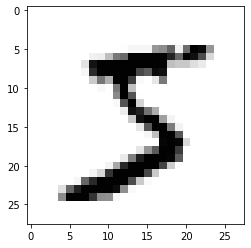

labels [1 0 0 0 0 0 0 0 0 0]


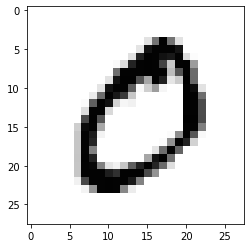

labels [0 0 0 0 1 0 0 0 0 0]


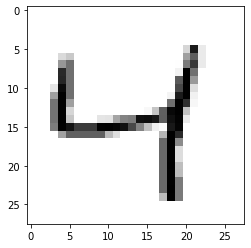

labels [0 1 0 0 0 0 0 0 0 0]


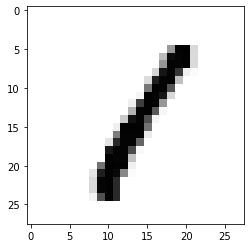

labels [0 0 0 0 0 0 0 0 0 1]


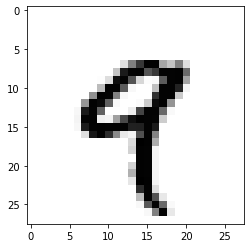

In [10]:
#image로 보기

for i in range(5):
    img =train_imgs[:,i].reshape((28,28)) #1차원 벡터 => 2차원으로 변환
    print('labels', tr_labels_one_hot[:,i]) #정답 벡터 
    plt.imshow(img, cmap="Greys")
    plt.show()

labels [0 0 0 0 0 0 0 1 0 0]


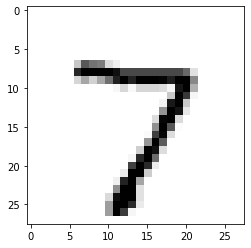

labels [0 0 1 0 0 0 0 0 0 0]


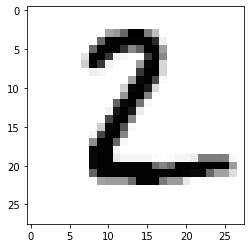

labels [0 1 0 0 0 0 0 0 0 0]


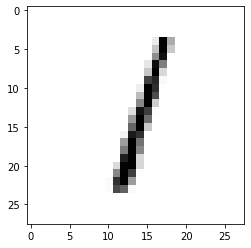

labels [1 0 0 0 0 0 0 0 0 0]


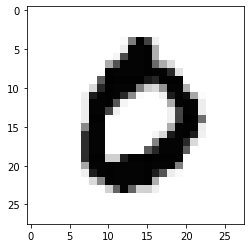

labels [0 0 0 0 1 0 0 0 0 0]


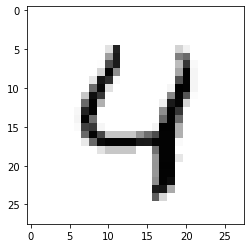

In [11]:
#직접 구현해보기 
for i in range(5):
    img =test_imgs[:,i].reshape((28,28))
    print('labels', tst_labels_one_hot[:,i])
    plt.imshow(img, cmap="Greys")
    plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

weights = [] #weights : matrix
biases = [] #bias : 
lambd = 0

def initialize(layers): 
    #weight값 초기화.
    #아무것도 훈련되지 않은 상태.
    #ex) 무지의 상태에서 쌓아 올리기.
    print('layers',layers)
        
    for i in range(len(layers)-1):

        weights.append(np.random.randn(layers[i+1], layers[i]))
        #print('weight shape',self.weights[i].shape)
        biases.append(np.random.randn(layers[i+1], 1))
        #print('biases shape',self.biases[i].shape)

    #nonlinear 함수 적용하기 for backpropagation
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))
    
    #sigmoid 함수 미분하기
def derivate_sigmoid():
    sigmoid = lambda x : np.exp(x)/(1+np.exp(x))
    return lambda x :sigmoid(x)*(1-sigmoid(x)) 

    #loss 계산하는 함수
    #cross entropy 이용
def compute_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum #전체 loss 평균
    
    return L
    
    #prediction 하는 함수

def forward(x):
    a = np.copy(x)
    z_s = [] # before non linear
    a_s = [a] # after non linear
    for i in range(len(weights)):
        z_s.append(weights[i].dot(a) + biases[i])
        a = sigmoid(z_s[-1]) # matrix 계산 마지막 결과를 a_s에다가 저장.
        a_s.append(a)
    return (z_s, a_s)
    
def backward(y, z_s, a_s):
    dw = []  
    db = []  
    deltas = [None] * len(weights)  
    deltas[-1] = ((y-a_s[-1])*(derivate_sigmoid())(z_s[-1])) 
    m = y.shape[1] #10000

    for i in reversed(range(len(deltas)-1)):
        deltas[i] = weights[i+1].T.dot(deltas[i+1])*(derivate_sigmoid()(z_s[i]))

    db = [d.dot(np.ones((m,1)))/m for d in deltas] #ppt에 explanation
    dw = [d.dot(a_s[i].T)/m  for i,d in enumerate(deltas)] #ppt에 explanation
    return dw, db
    
def train_and_test(x,x_test, train_y, test_y, epochs, lr):
    global weights, biases
    for e in range(epochs): 
        z_s, a_s = forward(x)
        dw, db = backward(train_y, z_s, a_s)

        weights = [w+lr*dweight for w,dweight in  zip(weights, dw)] #weight update
        biases = [w+lr*dbias for w,dbias in  zip(biases, db)] #biases update
        
        #train loss
        losses = compute_loss(train_y, a_s[-1])        
        #tran accuracy
        train_prediction = a_s[-1].copy()
        print('epoch %d'%e)
        print('Training accuracy {:.4f}'.format(np.mean(np.argmax(train_prediction, axis=0) == np.argmax(train_y,axis=0))))

        #test loss
        _, a_s= forward(x_test)

        test_prediction = a_s[-1].copy()
        print('test accuracy {:.4f}'.format(np.mean(np.argmax(test_prediction, axis=0) == np.argmax(test_y,axis=0))))

        
        
#30 65accuracy 
initialize([28*28, 100, 10])
train_and_test(train_imgs, test_imgs, tr_labels_one_hot, tst_labels_one_hot, epochs=11000, lr = .9)
print('done')
 

layers [784, 100, 10]
epoch 0
Training accuracy 0.1385
test accuracy 0.1394
epoch 1
Training accuracy 0.1351
test accuracy 0.1355
epoch 2
Training accuracy 0.1314
test accuracy 0.1310
epoch 3
Training accuracy 0.1276
test accuracy 0.1254
epoch 4
Training accuracy 0.1225
test accuracy 0.1203
epoch 5
Training accuracy 0.1184
test accuracy 0.1170
epoch 6
Training accuracy 0.1156
test accuracy 0.1156
epoch 7
Training accuracy 0.1140
test accuracy 0.1147
epoch 8
Training accuracy 0.1134
test accuracy 0.1144
epoch 9
Training accuracy 0.1131
test accuracy 0.1143
epoch 10
Training accuracy 0.1130
test accuracy 0.1142
epoch 11
Training accuracy 0.1129
test accuracy 0.1140
epoch 12
Training accuracy 0.1128
test accuracy 0.1140
epoch 13
Training accuracy 0.1128
test accuracy 0.1140
epoch 14
Training accuracy 0.1128
test accuracy 0.1140
epoch 15
Training accuracy 0.1128
test accuracy 0.1140
epoch 16
Training accuracy 0.1127
test accuracy 0.1140
epoch 17
Training accuracy 0.1127
test accuracy 0.114

KeyboardInterrupt: 